In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Load the data

data = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_ML_Master.mat')

m_t = pd.DataFrame({'Time':data['Time'].ravel().round(2), 'SS':data['SS'].ravel(), 'TTF':data['TTF'].ravel()})
a_t = pd.DataFrame({'Time':data['LocalAcTime'].ravel().round(2), 'A_filt':data['A_filt'].ravel(), 'V_filt':data['V_filt'].ravel(),
                    'T_pc':data['T_pc'].ravel(), 'Vel_pc':data['Vel_pc'].ravel()})   

#print(m_t['Time'].head(), m_t['Time'].tail())
#print(a_t['Time'].head(), a_t['Time'].tail())
df = a_t.merge(m_t, on='Time')

data2 = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_run1_pp_wAmp.mat')
df2 = pd.DataFrame({'maxFreqI_filt':data2['maxFreqI_filt'][3787:136186].ravel(), 'freqQAmpI_filt':data2['freqQAmpI_filt'][3787:136186].ravel()})
df = pd.concat([df, df2], axis=1)

print(df)


           Time       A_filt       V_filt  ...  TTF  maxFreqI_filt  freqQAmpI_filt
0       2102.90  1804.180000  5489.978529  ...  0.0  457680.400524    31438.277060
1       2102.91  1803.666667  5489.981454  ...  0.0  457727.638932    31421.341616
2       2102.92  1803.314286  5489.997639  ...  0.0  457770.778724    31409.798761
3       2102.93  1803.437500  5490.007016  ...  0.0  457811.889181    31398.815589
4       2102.94  1803.266667  5490.000189  ...  0.0  457775.514596    31395.584981
...         ...          ...          ...  ...  ...            ...             ...
132394  3426.85  1784.250000  5459.380488  ...  0.0  454414.128118    31041.955345
132395  3426.86  1784.055556  5459.377762  ...  0.0  454404.028108    31035.059531
132396  3426.87  1783.837500  5459.388352  ...  0.0  454403.709700    31020.001291
132397  3426.88  1783.371429  5459.398820  ...  0.0  454398.871858    31012.016780
132398  3426.89  1781.433333  5459.399041  ...  0.0  454410.333590    31010.874482

[13

In [3]:
def getcorr(a,b):
  corr, _ = pearsonr(a,b)
  return corr

# Correlation between SS and Features
c1 = getcorr(df['SS'], df['maxFreqI_filt'])
c2 = getcorr(df['SS'], df['freqQAmpI_filt'])
c3 = getcorr(df['SS'], df['A_filt'])
c4 = getcorr(df['SS'], df['V_filt'])
c5 = getcorr(df['SS'], df['Vel_pc'])

print('SS correlations: ', c1,c2,c3,c4,c5)

# Correlation between TTF and Features
c1 = getcorr(df['TTF'], df['maxFreqI_filt'])
c2 = getcorr(df['TTF'], df['freqQAmpI_filt'])
c3 = getcorr(df['TTF'], df['A_filt'])
c4 = getcorr(df['TTF'], df['V_filt'])
c5 = getcorr(df['TTF'], df['Vel_pc'])
print('TTF correlations: ',c1,c2,c3,c4,c5)

# Correlation between SS and TTF
c = getcorr(df['TTF'], df['SS'])
print('TTF and SS correlation: ', c)

SS correlations:  0.2403472222009742 0.009579241006927964 0.058109375246675435 0.27588188707671524 0.48808887048447613
TTF correlations:  -0.22645375720004246 0.19406422812640214 0.14573062616520643 -0.08974434434663045 -0.15644846048834324
TTF and SS correlation:  -0.8382302942484917


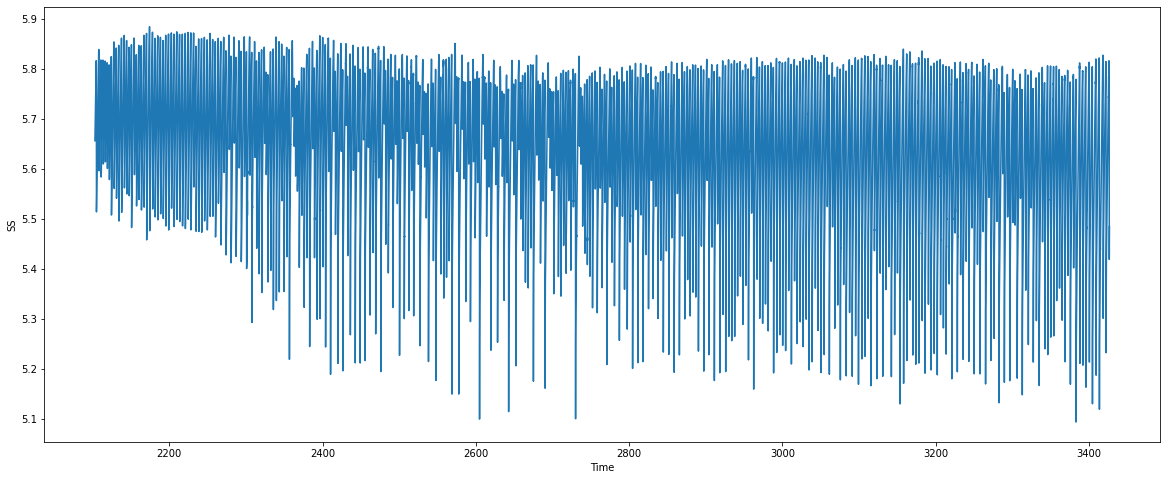

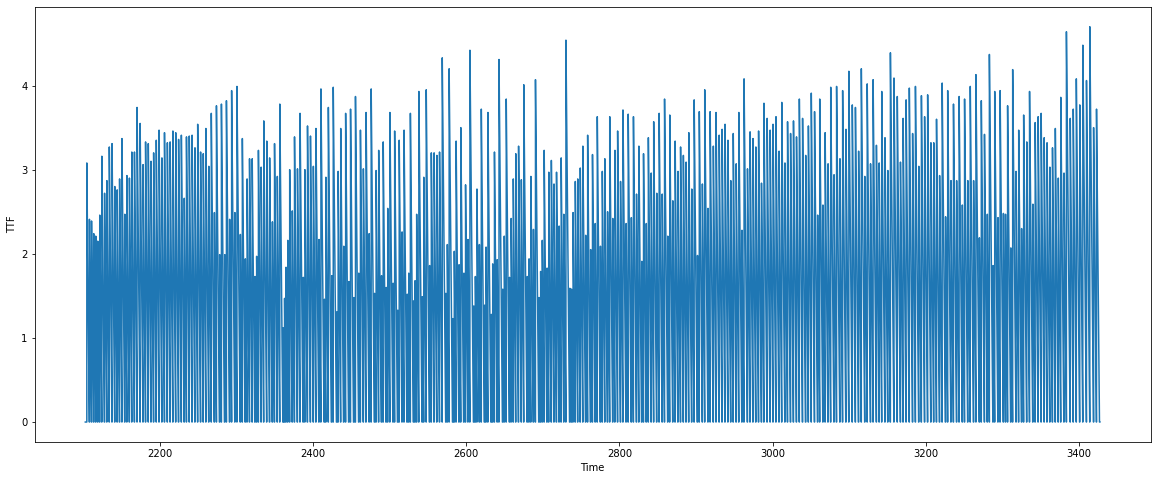

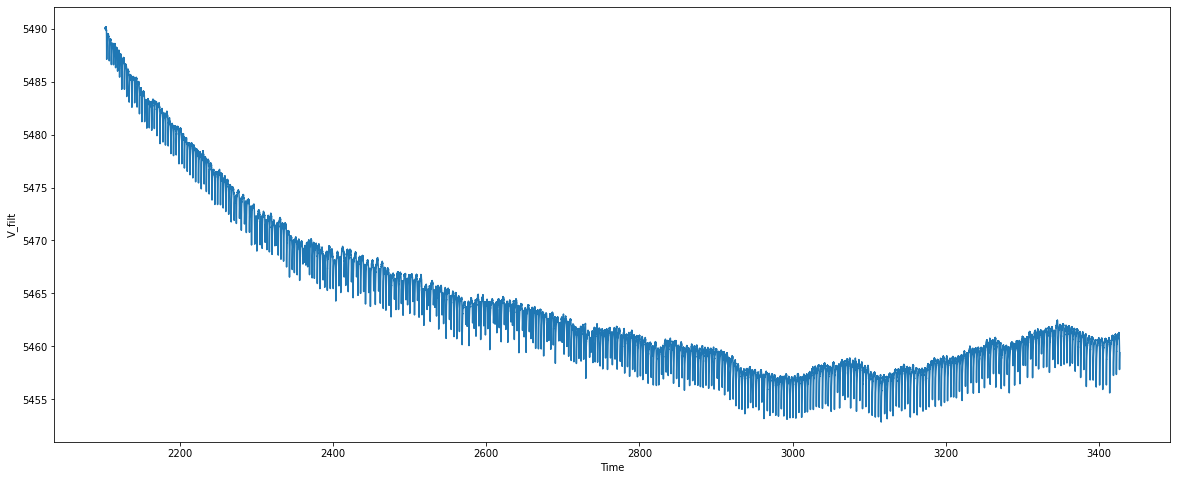

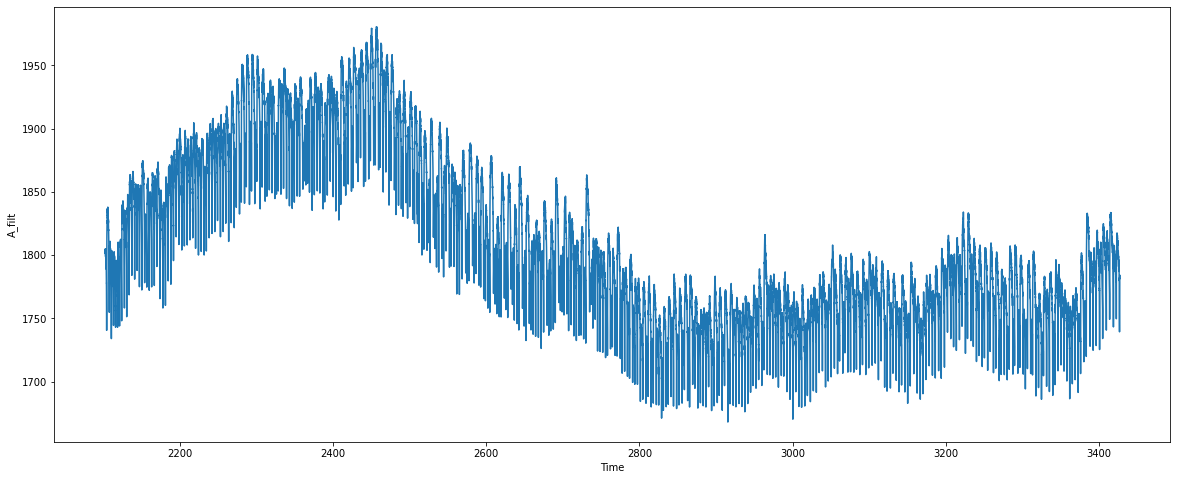

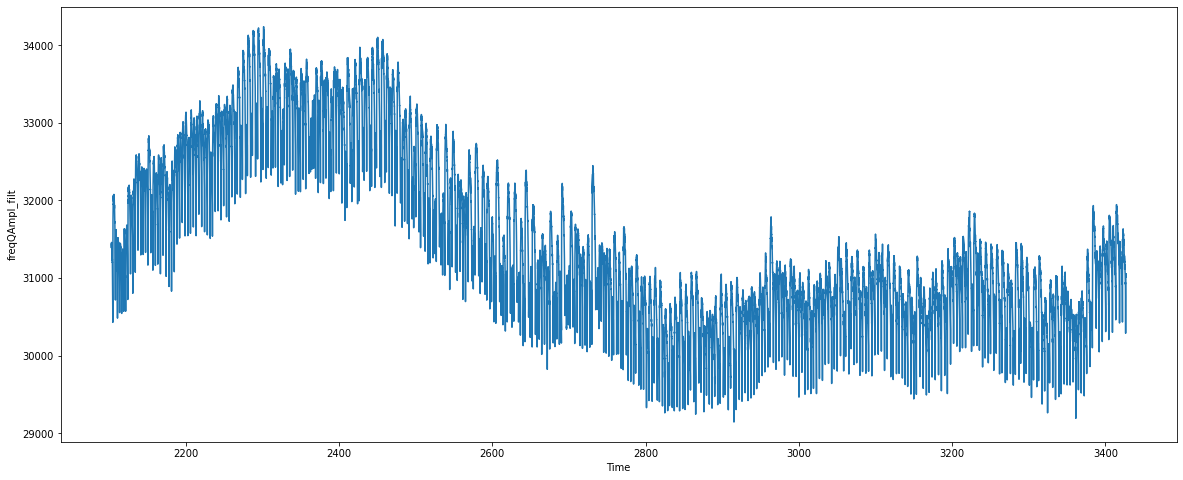

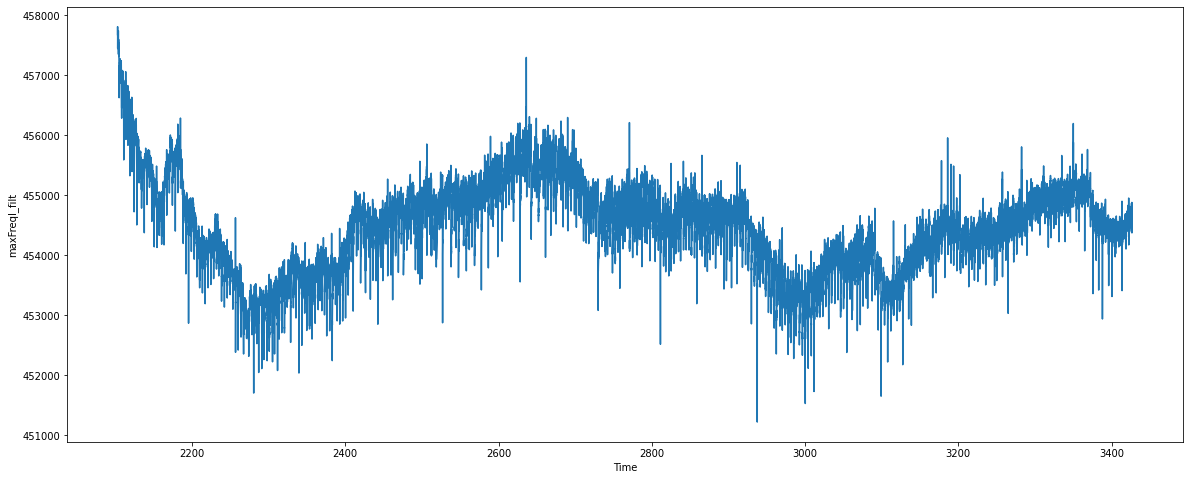

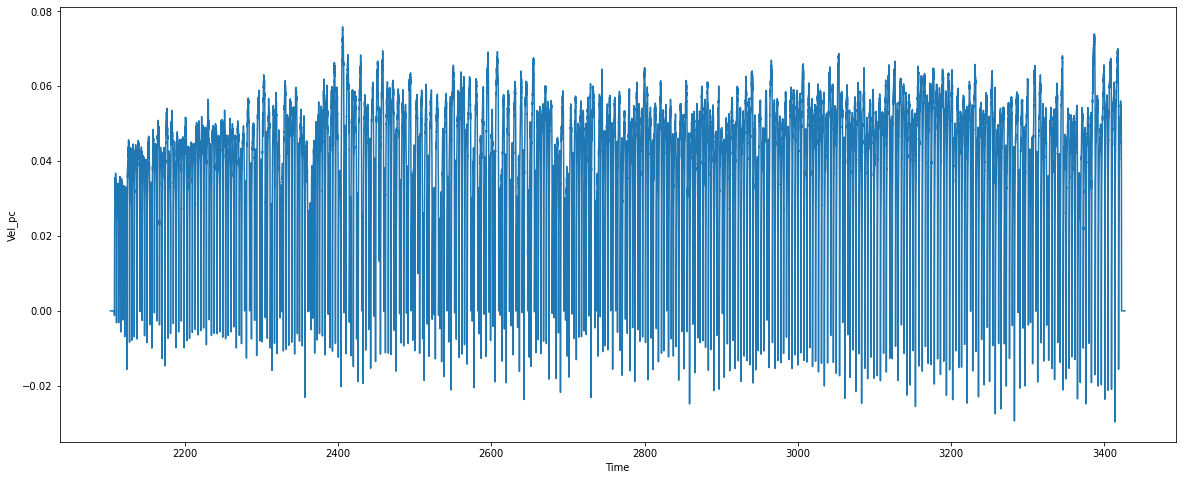

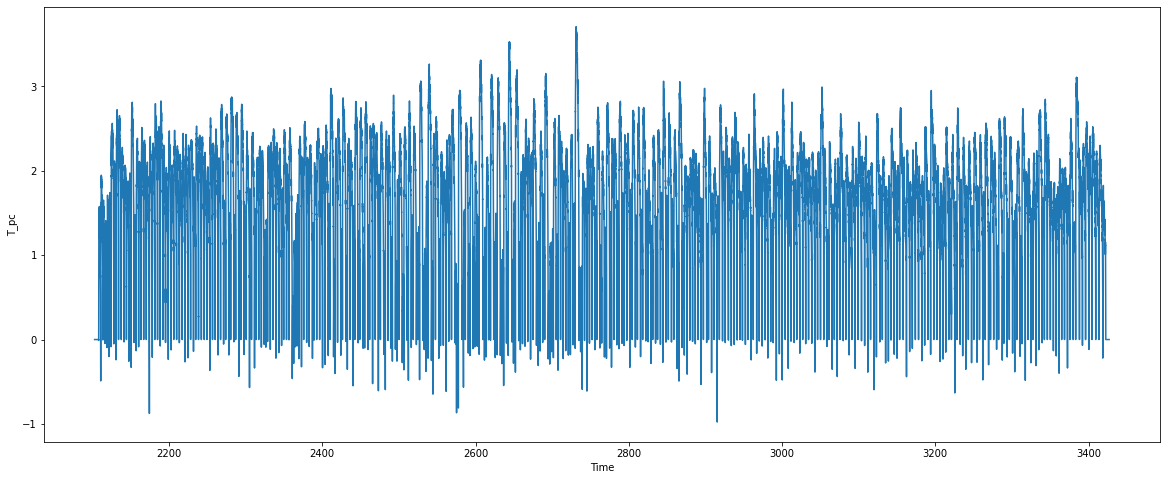

In [4]:
# plot the features and target variables

def plotting(i, y):
  fig = plt.figure(i, figsize=(20,8))
  plt.plot(df['Time'], df[y])
  plt.xlabel('Time')
  plt.ylabel(y)

plotting(1, 'SS')
plotting(2, 'TTF')
plotting(3, 'V_filt')
plotting(4, 'A_filt')
plotting(5, 'freqQAmpI_filt')
plotting(6, 'maxFreqI_filt')
plotting(7, 'Vel_pc')
plotting(8, 'T_pc')